In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style
sns.set_style("whitegrid")



In [28]:
import os
os.listdir("/content")



['.config', 'app.py', 'Life_Expectancy_Data.csv', 'sample_data']

In [29]:
df = pd.read_csv("/content/Life_Expectancy_Data.csv")


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: nicer plots
sns.set_style("whitegrid")


In [31]:
# Load the CSV file
df = pd.read_csv("/content/Life_Expectancy_Data.csv")

# Quick look at the first rows
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [32]:
df.shape


(1649, 22)

In [33]:
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns


Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [34]:
# Check missing values
df.isna().sum()



,0
country,0
year,0
status,0
life_expectancy,0
adult_mortality,0
infant_deaths,0
alcohol,0
percentage_expenditure,0
hepatitis_b,0
measles,0


In [35]:
# Drop rows with missing life expectancy
df = df.dropna(subset=['life_expectancy'])

# Confirm new shape
df.shape


(1649, 22)

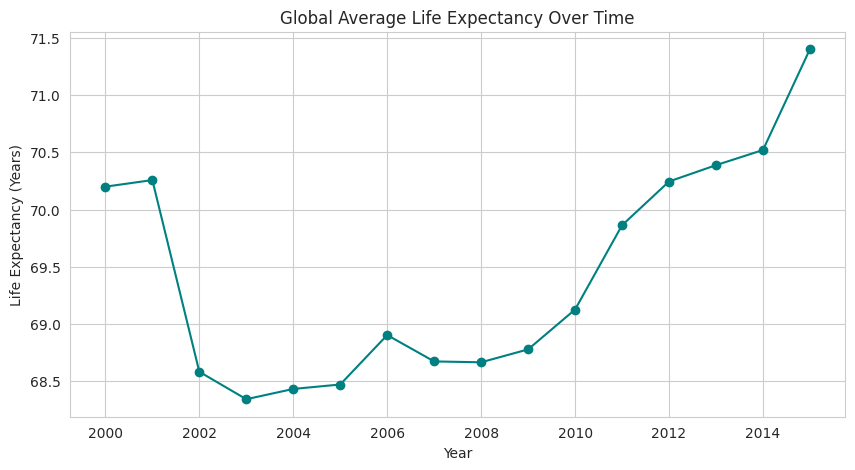

In [36]:
# Average life expectancy per year
avg_life_exp = df.groupby("year")["life_expectancy"].mean()

# Plot
plt.figure(figsize=(10,5))
plt.plot(avg_life_exp.index, avg_life_exp.values, marker='o', color='teal')
plt.title("Global Average Life Expectancy Over Time")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (Years)")
plt.show()


/tmp/ipython-input-882021540.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='life_expectancy', y='country', data=top10_countries, palette='viridis')


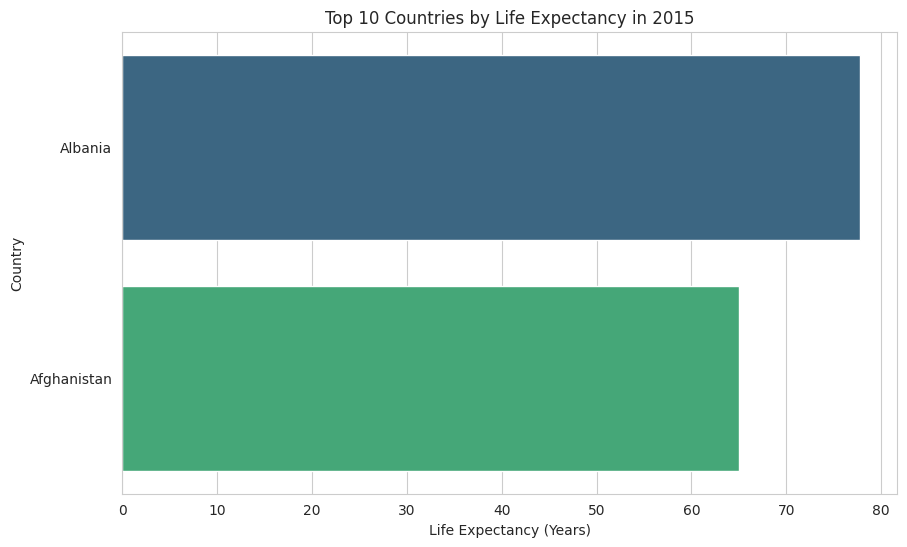

In [37]:
# Find the most recent year in the dataset
latest_year = df['year'].max()

# Filter data for the latest year
latest_data = df[df['year'] == latest_year]

# Get top 10 countries by life expectancy
top10_countries = latest_data.nlargest(10, 'life_expectancy')

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='life_expectancy', y='country', data=top10_countries, palette='viridis')
plt.title(f"Top 10 Countries by Life Expectancy in {latest_year}")
plt.xlabel("Life Expectancy (Years)")
plt.ylabel("Country")
plt.show()



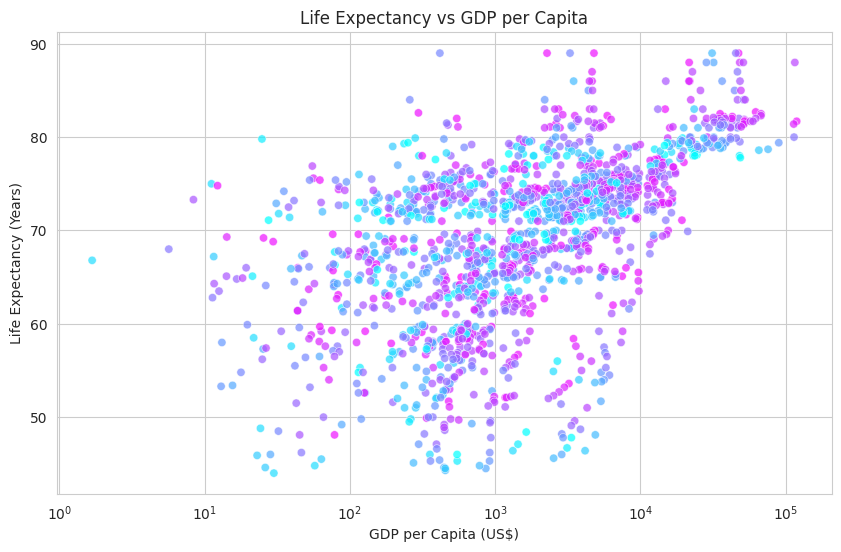

In [38]:
# Remove rows with missing GDP
scatter_data = df.dropna(subset=['gdp', 'life_expectancy'])

plt.figure(figsize=(10,6))
sns.scatterplot(x='gdp', y='life_expectancy', data=scatter_data, hue='year', palette='cool', alpha=0.7)
plt.title("Life Expectancy vs GDP per Capita")
plt.xlabel("GDP per Capita (US$)")
plt.ylabel("Life Expectancy (Years)")
plt.xscale('log')  # Log scale helps with very large GDP differences
plt.legend([],[], frameon=False)  # Hides the legend for clarity
plt.show()


In [39]:
# Check all column names in your dataset
df.columns


Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

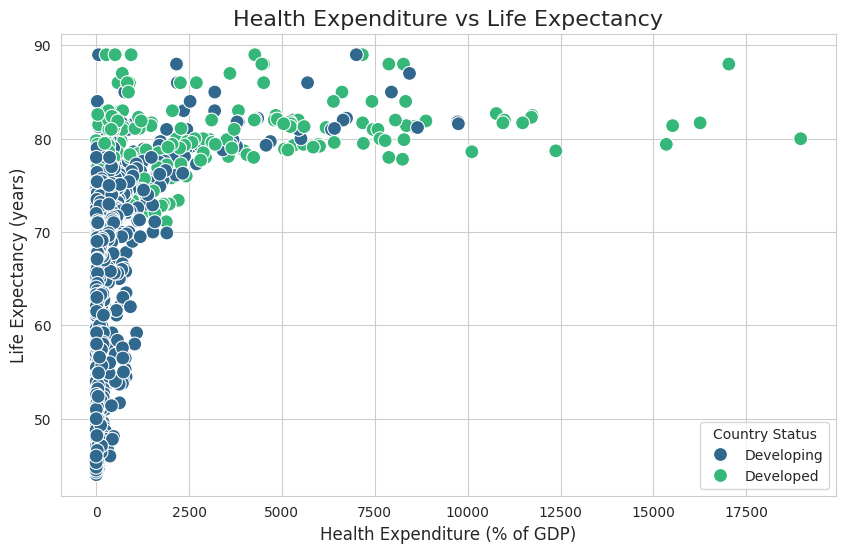

In [40]:
# Step 8: Visualization #4 - Health Expenditure vs Life Expectancy

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='percentage_expenditure',  # Correct column name for health expenditure %
    y='life_expectancy',         # Correct column name for life expectancy
    hue='status',                # Developed vs Developing countries
    palette='viridis',
    s=100
)
plt.title("Health Expenditure vs Life Expectancy", fontsize=16)
plt.xlabel("Health Expenditure (% of GDP)", fontsize=12)
plt.ylabel("Life Expectancy (years)", fontsize=12)
plt.legend(title='Country Status')
plt.show()


In [41]:
# Step 8b: Correlation between Health Expenditure and Life Expectancy
corr = df['percentage_expenditure'].corr(df['life_expectancy'])
print(f"Correlation between Health Expenditure and Life Expectancy: {corr:.2f}")


Correlation between Health Expenditure and Life Expectancy: 0.41


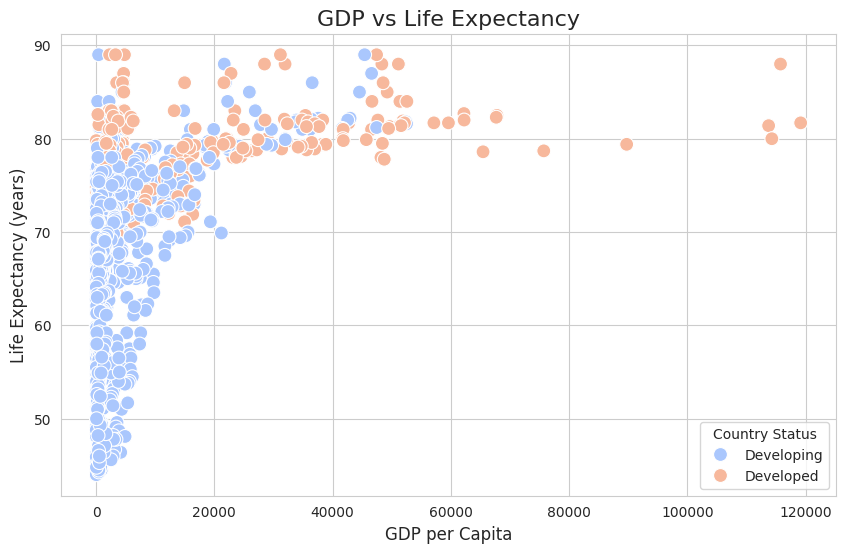

In [42]:
# Step 9: Visualization #5 - GDP vs Life Expectancy

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='gdp',                 # GDP column
    y='life_expectancy',     # Life expectancy column
    hue='status',            # Developed vs Developing countries
    palette='coolwarm',
    s=100
)
plt.title("GDP vs Life Expectancy", fontsize=16)
plt.xlabel("GDP per Capita", fontsize=12)
plt.ylabel("Life Expectancy (years)", fontsize=12)
plt.legend(title='Country Status')
plt.show()

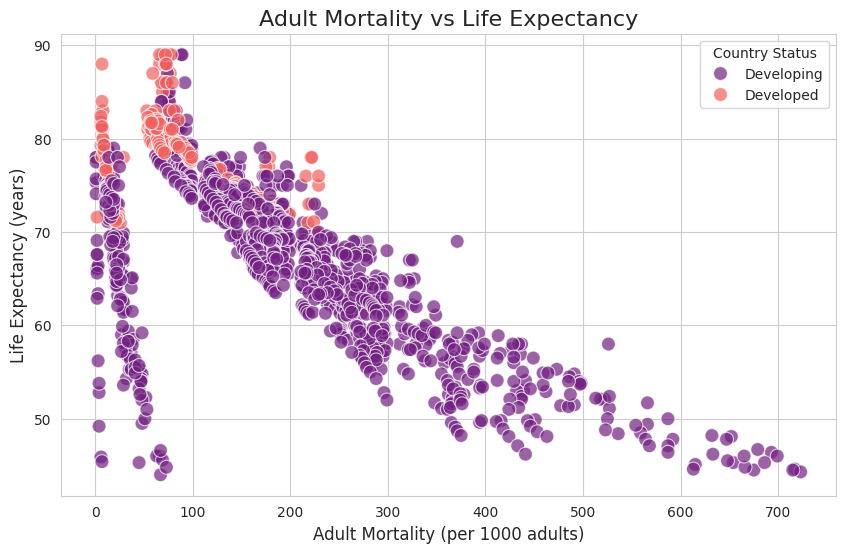

Correlation between Adult Mortality and Life Expectancy: -0.70


In [43]:
# Step 10: Visualization #6 - Adult Mortality vs Life Expectancy

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='adult_mortality',     # Adult mortality rate column
    y='life_expectancy',     # Life expectancy column
    hue='status',            # Developed vs Developing
    palette='magma',
    s=100,
    alpha=0.7
)
plt.title("Adult Mortality vs Life Expectancy", fontsize=16)
plt.xlabel("Adult Mortality (per 1000 adults)", fontsize=12)
plt.ylabel("Life Expectancy (years)", fontsize=12)
plt.legend(title='Country Status')
plt.show()

# Optional: Correlation
corr = df['adult_mortality'].corr(df['life_expectancy'])
print(f"Correlation between Adult Mortality and Life Expectancy: {corr:.2f}")


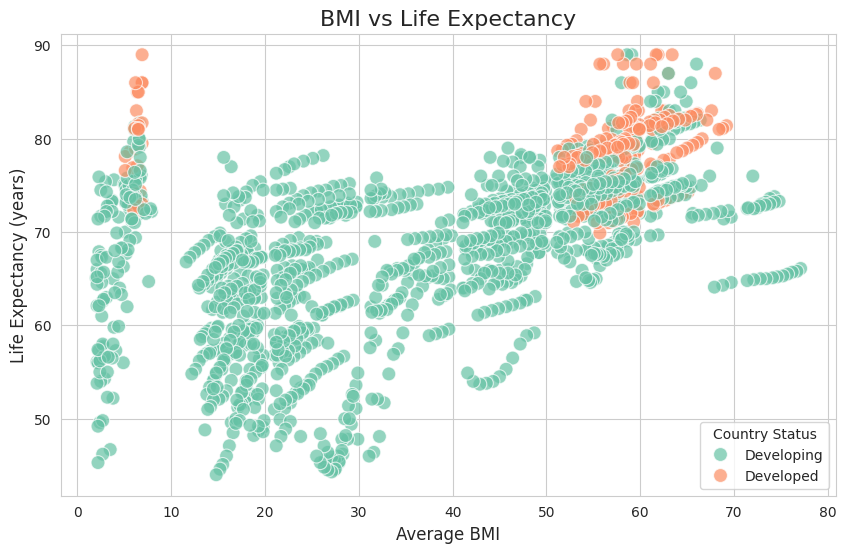

Correlation between BMI and Life Expectancy: 0.54


In [44]:
# Step 11: Visualization #7 - BMI vs Life Expectancy

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='bmi',                # Body Mass Index
    y='life_expectancy',    # Life expectancy
    hue='status',           # Developed vs Developing countries
    palette='Set2',
    s=100,
    alpha=0.7
)
plt.title("BMI vs Life Expectancy", fontsize=16)
plt.xlabel("Average BMI", fontsize=12)
plt.ylabel("Life Expectancy (years)", fontsize=12)
plt.legend(title='Country Status')
plt.show()

# Optional: Correlation
corr = df['bmi'].corr(df['life_expectancy'])
print(f"Correlation between BMI and Life Expectancy: {corr:.2f}")


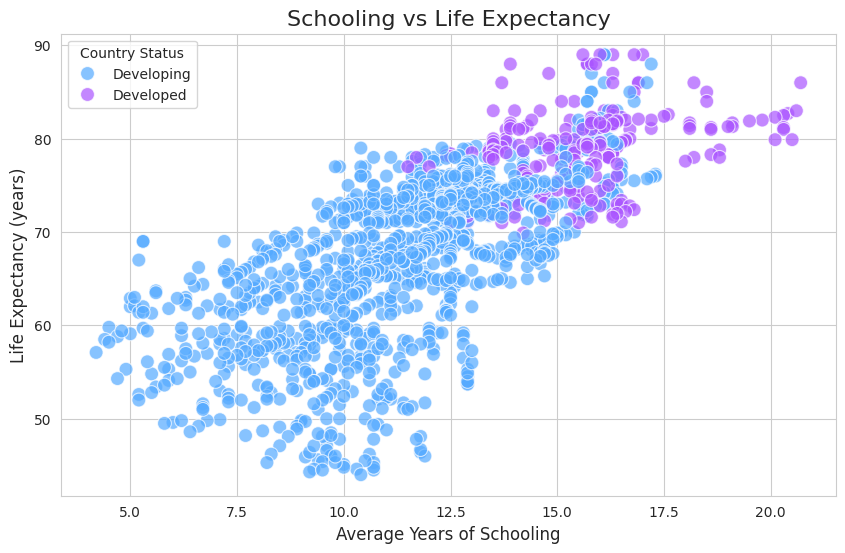

Correlation between Schooling and Life Expectancy: 0.73


In [45]:
# Step 12: Visualization #8 - Schooling vs Life Expectancy

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='schooling',          # Average years of schooling
    y='life_expectancy',    # Life expectancy
    hue='status',           # Developed vs Developing countries
    palette='cool',
    s=100,
    alpha=0.7
)
plt.title("Schooling vs Life Expectancy", fontsize=16)
plt.xlabel("Average Years of Schooling", fontsize=12)
plt.ylabel("Life Expectancy (years)", fontsize=12)
plt.legend(title='Country Status')
plt.show()

# Optional: Correlation
corr = df['schooling'].corr(df['life_expectancy'])
print(f"Correlation between Schooling and Life Expectancy: {corr:.2f}")


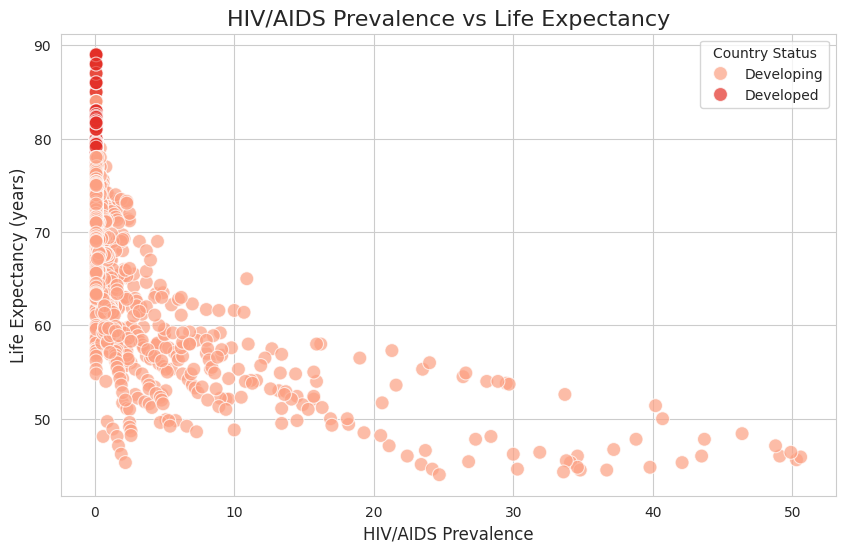

Correlation between HIV/AIDS Prevalence and Life Expectancy: -0.59


In [46]:
# Step 13: Visualization #9 - HIV/AIDS vs Life Expectancy

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='hiv/aids',           # HIV/AIDS prevalence
    y='life_expectancy',    # Life expectancy
    hue='status',           # Developed vs Developing countries
    palette='Reds',
    s=100,
    alpha=0.7
)
plt.title("HIV/AIDS Prevalence vs Life Expectancy", fontsize=16)
plt.xlabel("HIV/AIDS Prevalence", fontsize=12)
plt.ylabel("Life Expectancy (years)", fontsize=12)
plt.legend(title='Country Status')
plt.show()

# Optional: Correlation
corr = df['hiv/aids'].corr(df['life_expectancy'])
print(f"Correlation between HIV/AIDS Prevalence and Life Expectancy: {corr:.2f}")


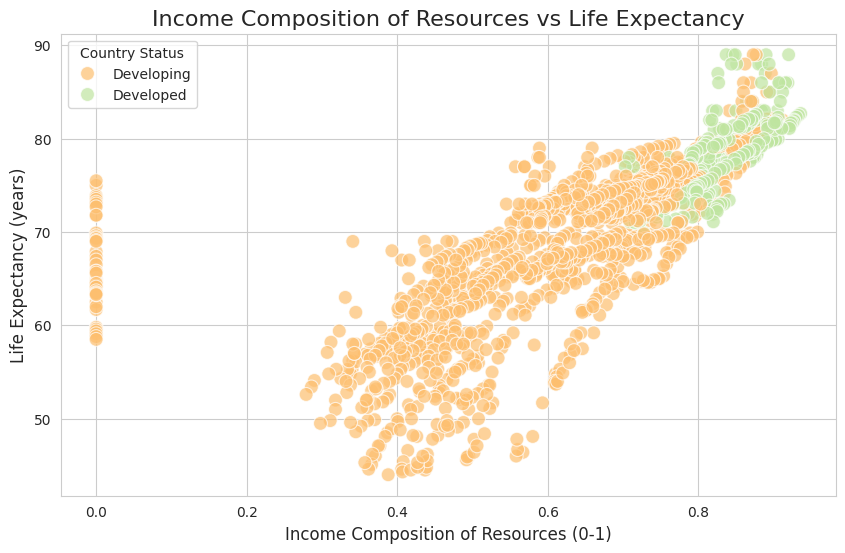

Correlation between Income Composition of Resources and Life Expectancy: 0.72


In [47]:
# Step 14: Visualization #10 - Income Composition vs Life Expectancy

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='income_composition_of_resources',  # Income composition index
    y='life_expectancy',
    hue='status',
    palette='Spectral',
    s=100,
    alpha=0.7
)
plt.title("Income Composition of Resources vs Life Expectancy", fontsize=16)
plt.xlabel("Income Composition of Resources (0-1)", fontsize=12)
plt.ylabel("Life Expectancy (years)", fontsize=12)
plt.legend(title='Country Status')
plt.show()

# Optional: Correlation
corr = df['income_composition_of_resources'].corr(df['life_expectancy'])
print(f"Correlation between Income Composition of Resources and Life Expectancy: {corr:.2f}")


In [49]:
import pandas as pd

df = pd.read_csv("Life_Expectancy_Data.csv")
print(df.columns)



Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')
